Source: https://michael-fuchs-python.netlify.app/2021/02/03/nn-multi-layer-perceptron-classifier-mlpclassifier/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

In [2]:
# input=pd.read_csv('training2.csv')
# df=pd.DataFrame(input,columns=['contrast-1-0',	'ASM-1-0',	'energy-1-0',	'homogeneity-1-0',	'dissimilarity-1-0',	
#                                  'contrast-1-45',	'ASM-1-45',	'energy-1-45',	'homogeneity-1-45',	'dissimilarity-1-45',
#                                  'contrast-1-90',	'ASM-1-90',	'energy-1-90',	'homogeneity-1-90',	'dissimilarity-1-90',
#                                  'contrast-1-135',	'ASM-1-135',	'energy-1-135',	'homogeneity-1-135',	'dissimilarity-1-135',	
#                                  'contrast-2-0',	'ASM-2-0',	'energy-2-0',	'homogeneity-2-0',	'dissimilarity-2-0',	
#                                  'contrast-2-45',	'ASM-2-45',	'energy-2-45',	'homogeneity-2-45',	'dissimilarity-2-45',	
#                                  'contrast-2-90',	'ASM-2-90',	'energy-2-90',	'homogeneity-2-90',	'dissimilarity-2-90',	
#                                  'contrast-2-135',	'ASM-2-135',	'energy-2-135',	'homogeneity-2-135',	'dissimilarity-2-135',
#                                  'contrast-3-0',	'ASM-3-0',	'energy-3-0',	'homogeneity-3-0',	'dissimilarity-3-0',
#                                  'contrast-3-45',	'ASM-3-45',	'energy-3-45',	'homogeneity-3-45',	'dissimilarity-3-45',	
#                                  'contrast-3-90',	'ASM-3-90',	'energy-3-90',	'homogeneity-3-90',	'dissimilarity-3-90',	
#                                  'contrast-3-135',	'ASM-3-135',	'energy-3-135',	'homogeneity-3-135',	'dissimilarity-3-135',
#                                  'L',	'a*',	'b*',	'output'])

input=pd.read_csv('training4.csv')
df=pd.DataFrame(input,columns=['ASM-1-0', 'energy-1-0', 'homogeneity-1-0', 'dissimilarity-1-0', 'ASM-1-45', 'energy-1-45', 'homogeneity-1-45', 'ASM-1-90', 
                                'energy-1-90', 'homogeneity-1-90', 'ASM-1-135', 'energy-1-135', 'homogeneity-1-135', 'ASM-2-0', 'energy-2-0', 'ASM-2-45',
                               'energy-2-45', 'ASM-2-90', 'energy-2-90', 'ASM-2-135', 'energy-2-135', 'homogeneity-2-135', 'ASM-3-0', 'energy-3-0',
                               'homogeneity-3-0', 'dissimilarity-3-0', 'ASM-3-45', 'energy-3-45', 'homogeneity-3-45', 'dissimilarity-3-45', 'ASM-3-90', 
                               'energy-3-90', 'homogeneity-3-90', 'dissimilarity-3-90', 'ASM-3-135', 'energy-3-135', 'homogeneity-3-135', 'output'])

In [3]:
# X = df.iloc[:,:63].values
X = df.iloc[:,:37].values

y = df.iloc[:,-1].values

trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.4)

sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [4]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(21,5), alpha = 0.0001,
                        max_iter = 100, activation = 'logistic', random_state = 1, 
                        learning_rate_init = 0.01, learning_rate = 'adaptive',
                        solver = 'adam')
mlp_clf.fit(trainX_scaled, trainY)

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(21, 5),
              learning_rate='adaptive', learning_rate_init=0.01, max_iter=100,
              random_state=1)

In [5]:
y_pred = mlp_clf.predict(testX_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.45


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


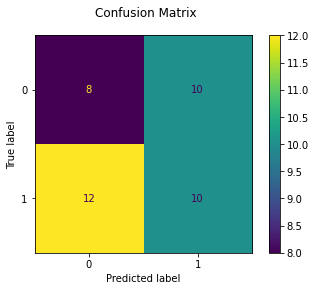

In [6]:
fig = plot_confusion_matrix(mlp_clf, testX_scaled, testY, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

In [7]:
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.44      0.42        18
           1       0.50      0.45      0.48        22

    accuracy                           0.45        40
   macro avg       0.45      0.45      0.45        40
weighted avg       0.45      0.45      0.45        40



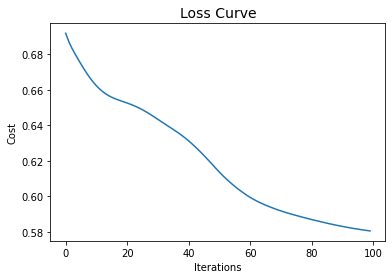

In [8]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [35]:
param_grid = {
    'hidden_layer_sizes': [(21,5,3), (21,5), (21)],
    'max_iter': [50, 100, 150, 300],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [36]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_)
 
grid_predictions = grid.predict(testX_scaled) 

print('Accuracy: {:.2f}'.format(accuracy_score(testY, grid_predictions)))

{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': 21, 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'adam'}
Accuracy: 0.55


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
